In [2]:
#Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#importing data charracters not in UTF-8
df = pd.read_csv("PBJ_Daily_Nurse_Staffing_Q1_2024.csv", encoding='ISO-8859-1')

/var/folders/wj/t_hntq2j583ghdyfg17304bm0000gn/T/ipykernel_29192/3020633134.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("PBJ_Daily_Nurse_Staffing_Q1_2024.csv", encoding='ISO-8859-1')


In [5]:
pd.set_option('display.max_columns', None)
df

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240101,50,8.0,8.0,0.0,8.00,8.00,0.0,40.07,40.07,0.0,0.00,0.00,0.0,18.16,18.16,0.0,156.34,156.34,0.0,0.00,0.00,0.0,0.00,0.00,0.0
1,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240102,49,8.0,8.0,0.0,18.24,18.24,0.0,58.89,58.89,0.0,0.00,0.00,0.0,22.96,22.96,0.0,149.40,149.40,0.0,0.00,0.00,0.0,0.00,0.00,0.0
2,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240103,49,8.0,8.0,0.0,15.10,15.10,0.0,55.02,55.02,0.0,0.00,0.00,0.0,20.70,20.70,0.0,147.15,147.15,0.0,0.00,0.00,0.0,0.00,0.00,0.0
3,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240104,50,8.0,8.0,0.0,14.90,14.90,0.0,57.13,57.13,0.0,0.00,0.00,0.0,12.70,12.70,0.0,142.21,142.21,0.0,0.00,0.00,0.0,0.00,0.00,0.0
4,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240105,51,8.0,8.0,0.0,15.47,15.47,0.0,46.76,46.76,0.0,0.00,0.00,0.0,27.44,27.44,0.0,149.40,149.40,0.0,0.00,0.00,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330961,745038,TIERRA ESTE NURSING AND REHABILITATION CENTER,EL PASO,TX,El Paso,141,2024Q1,20240327,81,8.0,8.0,0.0,4.33,4.33,0.0,13.33,13.33,0.0,8.00,8.00,0.0,100.22,100.22,0.0,139.88,139.88,0.0,15.34,15.34,0.0,22.70,22.70,0.0
1330962,745038,TIERRA ESTE NURSING AND REHABILITATION CENTER,EL PASO,TX,El Paso,141,2024Q1,20240328,83,8.0,8.0,0.0,0.00,0.00,0.0,8.68,8.68,0.0,7.00,7.00,0.0,117.53,117.53,0.0,158.07,158.07,0.0,16.26,16.26,0.0,17.47,17.47,0.0
1330963,745038,TIERRA ESTE NURSING AND REHABILITATION CENTER,EL PASO,TX,El Paso,141,2024Q1,20240329,85,8.0,8.0,0.0,0.00,0.00,0.0,12.70,12.70,0.0,4.25,4.25,0.0,76.10,76.10,0.0,146.04,146.04,0.0,5.57,5.57,0.0,17.94,17.94,0.0
1330964,745038,TIERRA ESTE NURSING AND REHABILITATION CENTER,EL PASO,TX,El Paso,141,2024Q1,20240330,82,0.0,0.0,0.0,5.48,5.48,0.0,29.19,29.19,0.0,0.00,0.00,0.0,73.43,73.43,0.0,115.43,115.43,0.0,0.00,0.00,0.0,14.35,14.35,0.0


In [6]:
# just to focus on the quater 1 of 2024   
df = df[df['CY_Qtr'] == '2024Q1']
print(f"Number of records for 2024Q1: {df.shape[0]}")

Number of records for 2024Q1: 1330966


In [7]:
### DATA CLEANING

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
# missing data

missing_data = df.isnull().sum()
missing_data

PROVNUM             0
PROVNAME            0
CITY                0
STATE               0
COUNTY_NAME         0
COUNTY_FIPS         0
CY_Qtr              0
WorkDate            0
MDScensus           0
Hrs_RNDON           0
Hrs_RNDON_emp       0
Hrs_RNDON_ctr       0
Hrs_RNadmin         0
Hrs_RNadmin_emp     0
Hrs_RNadmin_ctr     0
Hrs_RN              0
Hrs_RN_emp          0
Hrs_RN_ctr          0
Hrs_LPNadmin        0
Hrs_LPNadmin_emp    0
Hrs_LPNadmin_ctr    0
Hrs_LPN             0
Hrs_LPN_emp         0
Hrs_LPN_ctr         0
Hrs_CNA             0
Hrs_CNA_emp         0
Hrs_CNA_ctr         0
Hrs_NAtrn           0
Hrs_NAtrn_emp       0
Hrs_NAtrn_ctr       0
Hrs_MedAide         0
Hrs_MedAide_emp     0
Hrs_MedAide_ctr     0
dtype: int64

In [10]:
#  total contract hours across RN, LPN, and CNA
df['total_contract_hours'] = df['Hrs_RN_ctr'] + df['Hrs_LPN_ctr'] + df['Hrs_CNA_ctr']

# total hours (employee + contract) 
df['total_hours'] = df['Hrs_RN'] + df['Hrs_LPN'] + df['Hrs_CNA']

In [11]:
# contract-to-employee ratios 
df['RN_contract_ratio'] = (df['Hrs_RN_ctr'] / df['Hrs_RN'] * 100)
df['LPN_contract_ratio'] = (df['Hrs_LPN_ctr'] / df['Hrs_LPN'] * 100)
df['CNA_contract_ratio'] = (df['Hrs_CNA_ctr'] / df['Hrs_CNA'] * 100)
df['total_contract_ratio'] = (df['total_contract_hours'] / df['total_hours']) * 100

# Group by State and calculate the average contract ratio per role
state_summary = df.groupby('STATE').agg({
    'RN_contract_ratio': 'mean',
    'LPN_contract_ratio': 'mean',
    'CNA_contract_ratio': 'mean',
    'total_contract_ratio': 'mean'
}).reset_index()

state_summary['RN_contract_ratio'] = state_summary['RN_contract_ratio'].round(2)
state_summary['LPN_contract_ratio'] = state_summary['LPN_contract_ratio'].round(2)
state_summary['CNA_contract_ratio'] = state_summary['CNA_contract_ratio'].round(2)
state_summary["total_contract_ratio"] = state_summary['total_contract_ratio'].round(2)

state_summary

   STATE  RN_contract_ratio  LPN_contract_ratio  CNA_contract_ratio  \
0     AK              16.38               16.24               13.55   
1     AL               1.56                2.93                1.08   
2     AR               2.01                3.52                1.55   
3     AZ               6.07                7.38                5.90   
4     CA               2.33                3.43                4.27   
5     CO               8.74               14.39                9.92   
6     CT               6.96                7.27                5.04   
7     DC               7.63                5.47                6.25   
8     DE              13.61               17.78                9.55   
9     FL               3.16                4.88                2.05   
10    GA               4.64                7.00                7.08   
11    HI               8.35               23.88                6.76   
12    IA               8.23                7.87                7.37   
13    

In [12]:
# Sorting the data to find the top 10 states for each role
top_rn = state_summary[['STATE', 'RN_contract_ratio']].sort_values(by='RN_contract_ratio', ascending=False).head(10)
top_lpn = state_summary[['STATE', 'LPN_contract_ratio']].sort_values(by='LPN_contract_ratio', ascending=False).head(10)
top_cna = state_summary[['STATE', 'CNA_contract_ratio']].sort_values(by='CNA_contract_ratio', ascending=False).head(10)
top_total = state_summary[['STATE', 'total_contract_ratio']].sort_values(by='total_contract_ratio', ascending=False).head(10)

In [13]:
# Display the top 10 states for RN, LPN, and CNA contract ratios

print("Top 10 States for RN Contract Ratios:")
print(top_rn)

print("\nTop 10 States for LPN Contract Ratios:")
print(top_lpn)

print("\nTop 10 States for CNA Contract Ratios:")
print(top_cna)

print("\nTop 10 States for Total Contract Ratios:")
print(top_total)

Top 10 States for RN Contract Ratios:
   STATE  RN_contract_ratio
19    MA              16.98
0     AK              16.38
37    OR              15.98
38    PA              14.40
20    MD              13.62
8     DE              13.61
21    ME              13.60
47    VT              13.03
34    NY              12.45
23    MN              12.25

Top 10 States for LPN Contract Ratios:
   STATE  LPN_contract_ratio
47    VT               35.96
21    ME               27.79
11    HI               23.88
30    NH               20.87
38    PA               18.27
8     DE               17.78
37    OR               16.86
34    NY               16.78
26    MT               16.57
0     AK               16.24

Top 10 States for CNA Contract Ratios:
   STATE  CNA_contract_ratio
47    VT               32.95
28    ND               21.35
21    ME               19.24
31    NJ               15.36
26    MT               14.60
38    PA               14.58
37    OR               13.81
0     AK               

In [14]:
# Sorting the data to find the least 10 states for each role
least_rn = state_summary[['STATE', 'RN_contract_ratio']].sort_values(by='RN_contract_ratio', ascending=True).head(10)
least_lpn = state_summary[['STATE', 'LPN_contract_ratio']].sort_values(by='LPN_contract_ratio', ascending=True).head(10)
least_cna = state_summary[['STATE', 'CNA_contract_ratio']].sort_values(by='CNA_contract_ratio', ascending=True).head(10)
least_total = state_summary[['STATE', 'total_contract_ratio']].sort_values(by='total_contract_ratio', ascending=True).head(10)

# Display the least 10 states for RN, LPN, and CNA contract ratios
print("Least 10 States for RN Contract Ratios:")
print(least_rn)

print("\nLeast 10 States for LPN Contract Ratios:")
print(least_lpn)

print("\nLeast 10 States for CNA Contract Ratios:")
print(least_cna)

print("\nTop 10 States for Total Contract Ratios:")
print(least_total)

Least 10 States for RN Contract Ratios:
   STATE  RN_contract_ratio
1     AL               1.56
39    PR               2.00
2     AR               2.01
4     CA               2.33
44    TX               2.51
18    LA               2.52
22    MI               2.93
36    OK               3.12
9     FL               3.16
50    WV               3.74

Least 10 States for LPN Contract Ratios:
   STATE  LPN_contract_ratio
39    PR                0.38
1     AL                2.93
4     CA                3.43
2     AR                3.52
36    OK                3.59
45    UT                4.78
9     FL                4.88
44    TX                4.95
7     DC                5.47
16    KS                5.64

Least 10 States for CNA Contract Ratios:
   STATE  CNA_contract_ratio
1     AL                1.08
2     AR                1.55
9     FL                2.05
15    IN                2.45
22    MI                2.71
36    OK                3.82
13    ID                3.91
4     CA         

In [15]:
top_10_total = top_total['STATE'].tolist()
least_10_total = least_total['STATE'].tolist()

Text(0.5, 0, 'Contract Ratio')

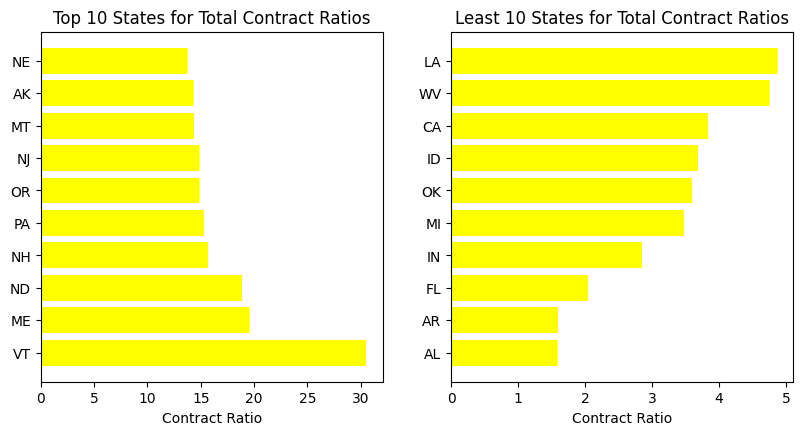

In [16]:
# plot for the total contract
plt.figure(figsize=(15, 10))


plt.subplot(2, 3, 5)
plt.barh(top_total['STATE'], top_total['total_contract_ratio'], color='Yellow')
plt.title('Top 10 States for Total Contract Ratios')
plt.xlabel('Contract Ratio')

# Least CNA
plt.subplot(2, 3, 6)
plt.barh(least_cna['STATE'], least_total['total_contract_ratio'], color='Yellow')
plt.title('Least 10 States for Total Contract Ratios')
plt.xlabel('Contract Ratio')

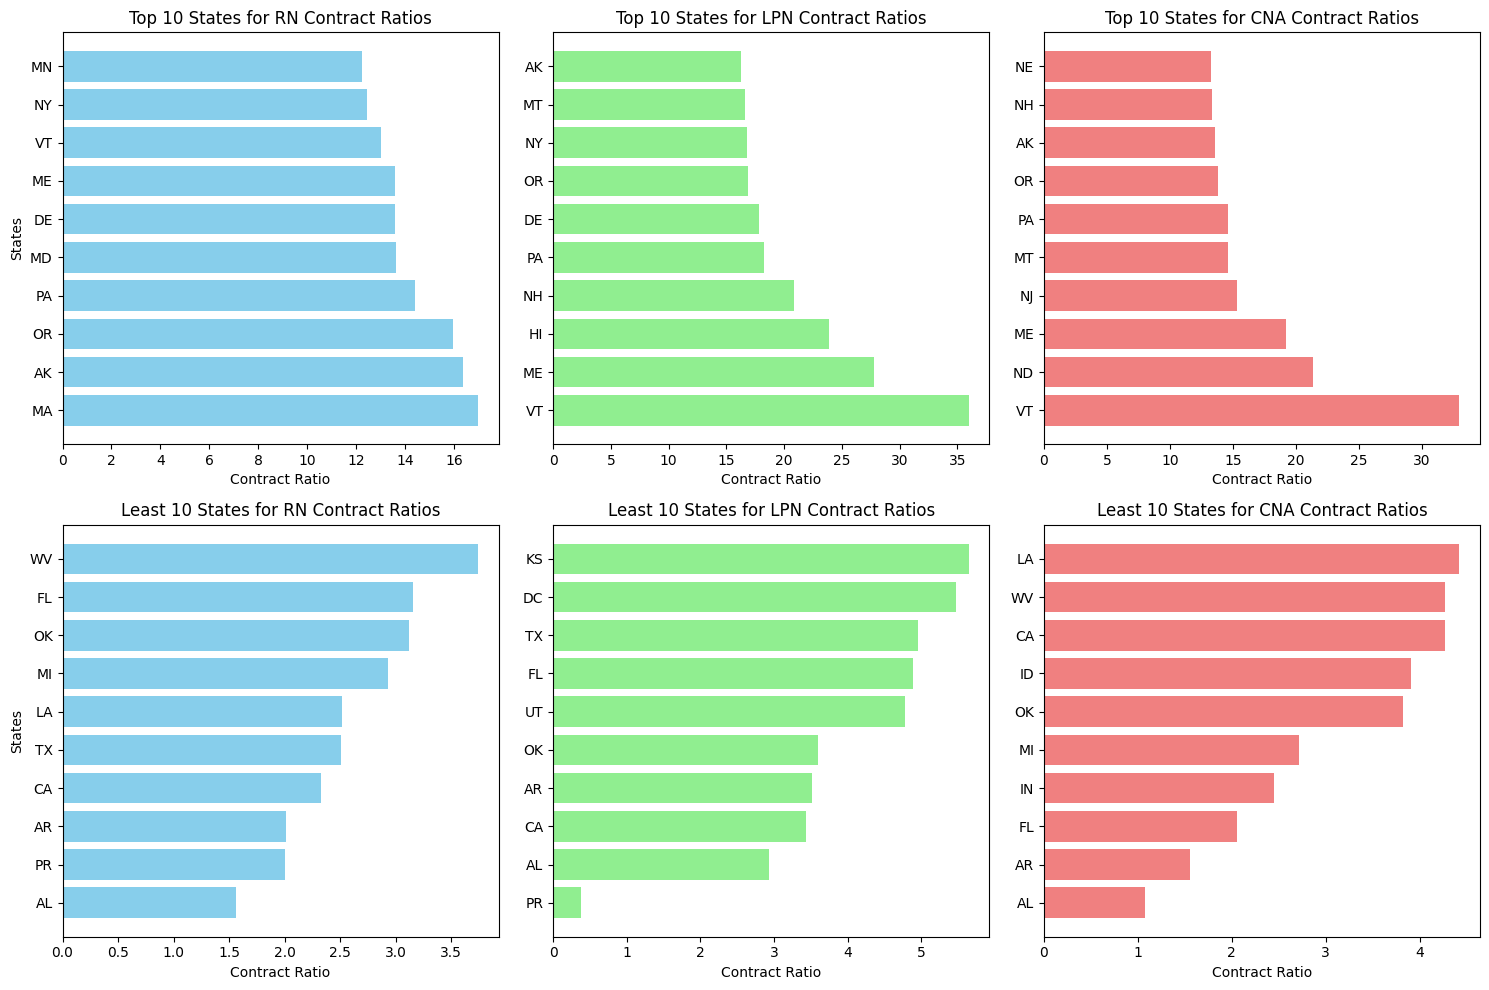

In [17]:
# 1. Plot the Top 10 for RN, LPN, and CNA

plt.figure(figsize=(15, 10))

# Top RN
plt.subplot(2, 3, 1)
plt.barh(top_rn['STATE'], top_rn['RN_contract_ratio'], color='skyblue')
plt.title('Top 10 States for RN Contract Ratios')
plt.xlabel('Contract Ratio')
plt.ylabel('States')

# Top LPN
plt.subplot(2, 3, 2)
plt.barh(top_lpn['STATE'], top_lpn['LPN_contract_ratio'], color='lightgreen')
plt.title('Top 10 States for LPN Contract Ratios')
plt.xlabel('Contract Ratio')

# Top CNA
plt.subplot(2, 3, 3)
plt.barh(top_cna['STATE'], top_cna['CNA_contract_ratio'], color='lightcoral')
plt.title('Top 10 States for CNA Contract Ratios')
plt.xlabel('Contract Ratio')

# 2. Plot the Least 10 for RN, LPN, and CNA
# Least RN
plt.subplot(2, 3, 4)
plt.barh(least_rn['STATE'], least_rn['RN_contract_ratio'], color='skyblue')
plt.title('Least 10 States for RN Contract Ratios')
plt.xlabel('Contract Ratio')
plt.ylabel('States')

# Least LPN
plt.subplot(2, 3, 5)
plt.barh(least_lpn['STATE'], least_lpn['LPN_contract_ratio'], color='lightgreen')
plt.title('Least 10 States for LPN Contract Ratios')
plt.xlabel('Contract Ratio')

# Least CNA
plt.subplot(2, 3, 6)
plt.barh(least_cna['STATE'], least_cna['CNA_contract_ratio'], color='lightcoral')
plt.title('Least 10 States for CNA Contract Ratios')
plt.xlabel('Contract Ratio')

plt.tight_layout()
plt.show()

In [18]:
#  CMS guidelines and industry recommendations.

# RN (Registered Nurse): 0.5 hours per patient per day
# LPN (Licensed Practical Nurse): 0.8 hours per patient per day
# CNA (Certified Nursing Assistant): 2.5 hours per patient per day

total_benchmark = 3.8

# Check if there are any rows where MDSCensus is zero
zero_census = df[df['MDScensus'] == 0]

# Display rows with zero MDSCensus
print("Rows with MDSCensus equal to 0:")
print(zero_census)

df = df[df['MDScensus'] != 0] # lets just filter out

Rows with MDSCensus equal to 0:
        PROVNUM                                     PROVNAME        CITY  \
95939     56182                       GOLDEN HILL POST ACUTE   SAN DIEGO   
95940     56182                       GOLDEN HILL POST ACUTE   SAN DIEGO   
95941     56182                       GOLDEN HILL POST ACUTE   SAN DIEGO   
95942     56182                       GOLDEN HILL POST ACUTE   SAN DIEGO   
95943     56182                       GOLDEN HILL POST ACUTE   SAN DIEGO   
...         ...                                          ...         ...   
1281303  675856  WHITESBORO HEALTH AND REHABILITATION CENTER  WHITESBORO   
1281304  675856  WHITESBORO HEALTH AND REHABILITATION CENTER  WHITESBORO   
1281305  675856  WHITESBORO HEALTH AND REHABILITATION CENTER  WHITESBORO   
1281306  675856  WHITESBORO HEALTH AND REHABILITATION CENTER  WHITESBORO   
1281307  675856  WHITESBORO HEALTH AND REHABILITATION CENTER  WHITESBORO   

        STATE COUNTY_NAME  COUNTY_FIPS  CY_Qtr  WorkDat

In [19]:
#  staff-to-resident ratios (hours worked per resident)
df['RN_staff_ratio'] = df['Hrs_RN'] / df['MDScensus']
df['LPN_staff_ratio'] = df['Hrs_LPN'] / df['MDScensus']
df['CNA_staff_ratio'] = df['Hrs_CNA'] / df['MDScensus']

# total staff-to-resident ratio
df['Total_staff_ratio'] = df['RN_staff_ratio'] + df['LPN_staff_ratio'] + df['CNA_staff_ratio']

# Round all relevant columns to 2 decimal places
df['Total_staff_ratio'] = df['Total_staff_ratio'].round(2)
df['RN_contract_ratio'] = df['RN_contract_ratio'].round(2)
df['LPN_contract_ratio'] = df['LPN_contract_ratio'].round(2)
df['CNA_contract_ratio'] = df['CNA_contract_ratio'].round(2)

# Apply logic to classify states as "Adequately Staffed" or "Understaffed"
df['Staffing_status'] = df['Total_staff_ratio'].apply(lambda x: 'Adequately Staffed' if x >= total_benchmark else 'Understaffed')

# Display the cleaned and structured DataFrame
print(df[['STATE', 'Total_staff_ratio', 'Staffing_status', 'RN_contract_ratio', 'LPN_contract_ratio', 'CNA_contract_ratio']])

        STATE  Total_staff_ratio     Staffing_status  RN_contract_ratio  \
0          AL               4.29  Adequately Staffed                0.0   
1          AL               4.72  Adequately Staffed                0.0   
2          AL               4.55  Adequately Staffed                0.0   
3          AL               4.24  Adequately Staffed                0.0   
4          AL               4.38  Adequately Staffed                0.0   
...       ...                ...                 ...                ...   
1330961    TX               3.13        Understaffed                0.0   
1330962    TX               3.43        Understaffed                0.0   
1330963    TX               2.76        Understaffed                0.0   
1330964    TX               2.66        Understaffed                0.0   
1330965    TX               2.22        Understaffed                0.0   

         LPN_contract_ratio  CNA_contract_ratio  
0                       0.0                 0.0  

In [20]:
state_summary = df.groupby('STATE').agg({
    'Hrs_RN': 'sum',
    'Hrs_LPN': 'sum',
    'Hrs_CNA': 'sum',
    'MDScensus': 'sum',
    'RN_contract_ratio': 'mean',  # Average contract ratios
    'LPN_contract_ratio': 'mean',
    'CNA_contract_ratio': 'mean'
}).reset_index()

# Calculate staff-to-resident ratios 
state_summary['RN_staff_ratio'] = state_summary['Hrs_RN'] / state_summary['MDScensus']
state_summary['LPN_staff_ratio'] = state_summary['Hrs_LPN'] / state_summary['MDScensus']
state_summary['CNA_staff_ratio'] = state_summary['Hrs_CNA'] / state_summary['MDScensus']

# Calculate the total staff-to-resident ratio
state_summary['Total_staff_ratio'] = state_summary['RN_staff_ratio'] + state_summary['LPN_staff_ratio'] + state_summary['CNA_staff_ratio']

# Round all relevant columns to 2 decimal places
state_summary['Total_staff_ratio'] = state_summary['Total_staff_ratio'].round(2)
state_summary['RN_contract_ratio'] = state_summary['RN_contract_ratio'].round(2)
state_summary['LPN_contract_ratio'] = state_summary['LPN_contract_ratio'].round(2)
state_summary['CNA_contract_ratio'] = state_summary['CNA_contract_ratio'].round(2)

# Apply logic to classify states as "Adequately Staffed" or "Understaffed"
state_summary['Staffing_status'] = state_summary['Total_staff_ratio'].apply(lambda x: 'Adequately Staffed' if x >= total_benchmark else 'Understaffed')

# Display the cleaned and aggregated DataFrame
print(state_summary[['STATE', 'Total_staff_ratio', 'Staffing_status', 'RN_contract_ratio', 'LPN_contract_ratio', 'CNA_contract_ratio']])

   STATE  Total_staff_ratio     Staffing_status  RN_contract_ratio  \
0     AK               5.60  Adequately Staffed              16.38   
1     AL               3.23        Understaffed               1.56   
2     AR               3.41        Understaffed               2.01   
3     AZ               3.63        Understaffed               6.07   
4     CA               3.95  Adequately Staffed               2.33   
5     CO               3.28        Understaffed               8.74   
6     CT               3.34        Understaffed               6.96   
7     DC               3.89  Adequately Staffed               7.63   
8     DE               3.72        Understaffed              13.61   
9     FL               3.49        Understaffed               3.15   
10    GA               3.01        Understaffed               4.64   
11    HI               3.97  Adequately Staffed               8.35   
12    IA               3.13        Understaffed               8.24   
13    ID            

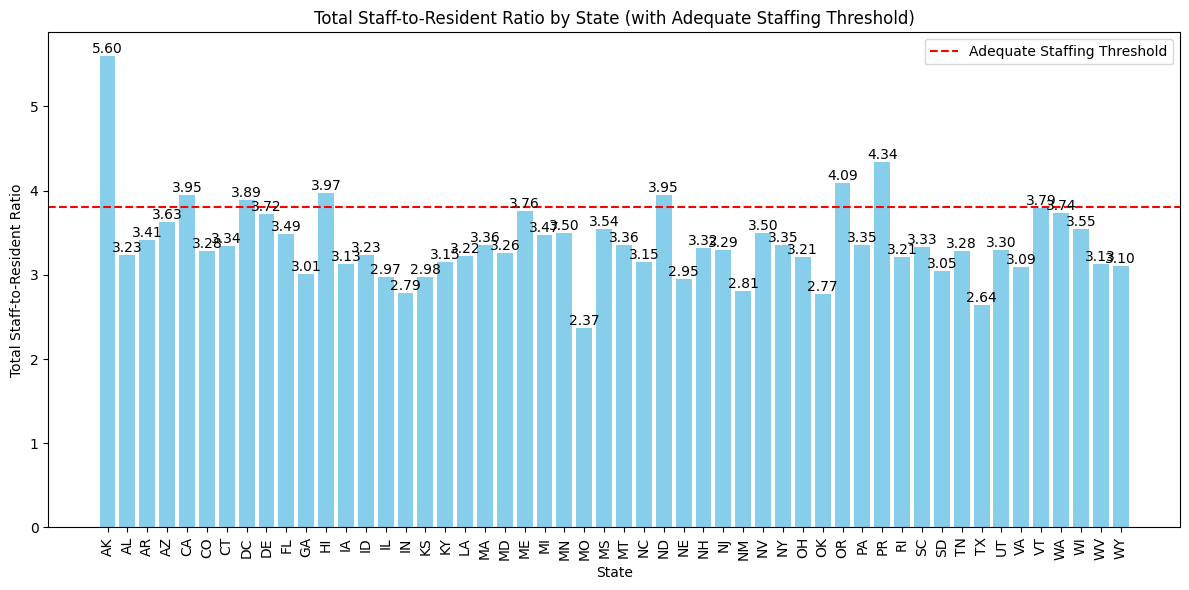

In [21]:
# Plot Total Staff-to-Resident Ratios from the cleaned and aggregated DataFrame
plt.figure(figsize=(12, 6))
bars = plt.bar(state_summary['STATE'], state_summary['Total_staff_ratio'], color='skyblue')

# Add a horizontal line at the benchmark for adequately staffed
plt.axhline(y=total_benchmark, color='r', linestyle='--', label='Adequate Staffing Threshold')

plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Staff-to-Resident Ratio')
plt.title('Total Staff-to-Resident Ratio by State (with Adequate Staffing Threshold)')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()

In [22]:
# Trend analysis

In [23]:
# Ensure WorkDate is in datetime format
df['WorkDate'] = pd.to_datetime(df['WorkDate'], format='%Y%m%d')

# Extract month and year from WorkDate
df['YearMonth'] = df['WorkDate'].dt.to_period('M')

print(df[['WorkDate', 'YearMonth']].head())

    WorkDate YearMonth
0 2024-01-01   2024-01
1 2024-01-02   2024-01
2 2024-01-03   2024-01
3 2024-01-04   2024-01
4 2024-01-05   2024-01


In [24]:
monthly_trend_data = df.groupby(['STATE', 'YearMonth']).agg({
    'total_contract_ratio': 'mean',  
    'Total_staff_ratio': 'mean'    
}).reset_index()

monthly_trend_data.head(20)

,STATE,YearMonth,total_contract_ratio,Total_staff_ratio
0,AK,2024-01,14.412845,6.323247
1,AK,2024-02,13.669004,6.226299
2,AK,2024-03,14.558324,6.246000
3,AL,2024-01,1.532721,3.315976
4,AL,2024-02,1.618705,3.293758
5,AL,2024-03,1.611078,3.226732
6,AR,2024-01,2.116181,3.458720
7,AR,2024-02,2.023757,3.432539
8,AR,2024-03,1.999541,3.391555
9,AZ,2024-01,6.227274,3.659629


In [162]:
# def plot_monthly_trend(state):
#     state_trend = monthly_trend_data[monthly_trend_data['STATE'] == state]
    
#     plt.figure(figsize=(10, 6))
    
#     # Plot total contract ratio over months
#     plt.plot(state_trend['YearMonth'].astype(str), state_trend['total_contract_ratio'], label='Total Contract Ratio (%)', color='b')
    
#     # Plot staffing adequacy (Total Staff Ratio) over months
#     plt.plot(state_trend['YearMonth'].astype(str), state_trend['Total_staff_ratio'], label='Total Staff-to-Resident Ratio', color='r')
    
#     plt.title(f"Monthly Trend for {state}")
#     plt.xlabel("Month")
#     plt.ylabel("Ratio")
#     plt.xticks(rotation=45)
#     plt.legend()
#     plt.show()

# plot_monthly_trend('CA')

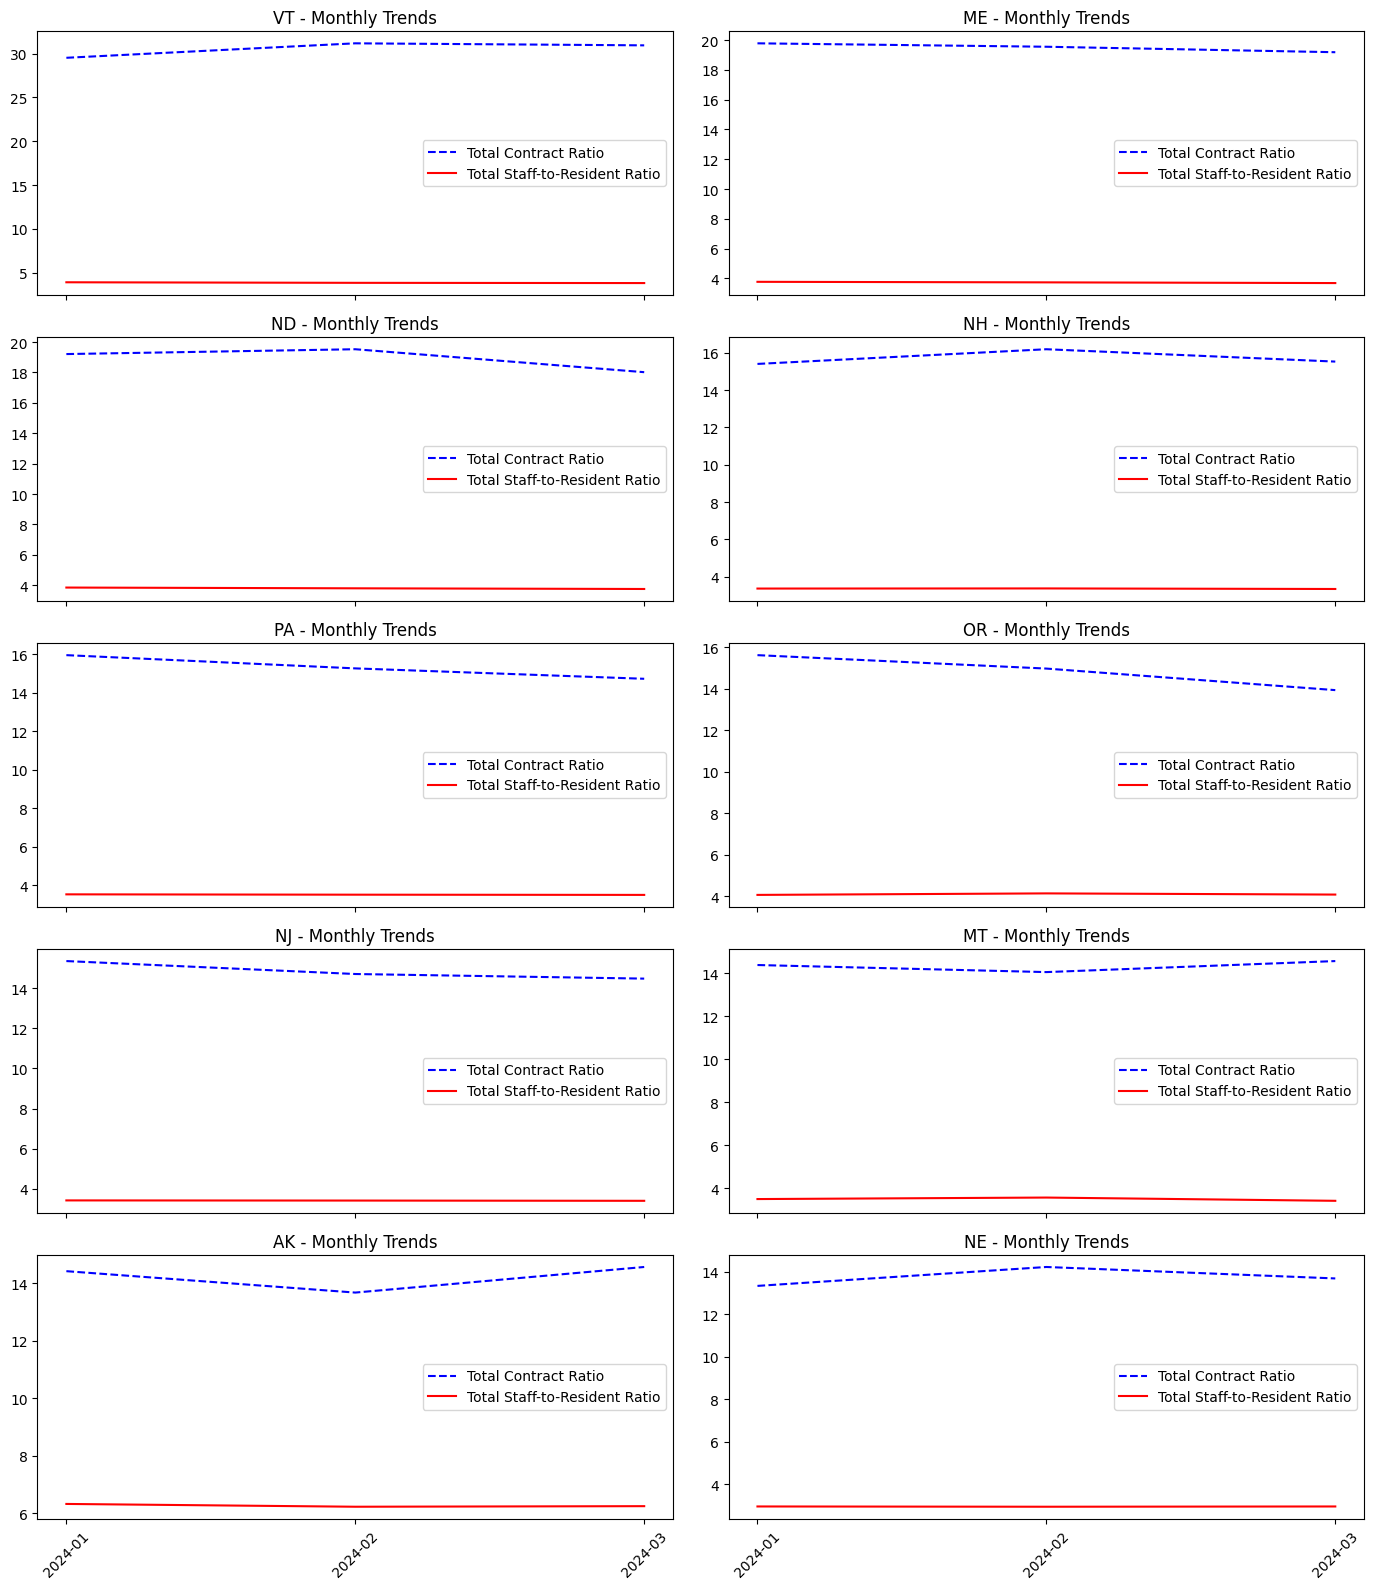

In [26]:
# trend analysis of top 10 states
def plot_top_10_subplots(states):
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 16), sharex=True)
    axes = axes.flatten()
    
    for i, state in enumerate(states):
        state_trend = monthly_trend_data[monthly_trend_data['STATE'] == state]
        
        # Plot Contract and Staff Ratio for each state
        axes[i].plot(state_trend['YearMonth'].astype(str), state_trend['total_contract_ratio'], label='Total Contract Ratio', color='b', linestyle='--')
        axes[i].plot(state_trend['YearMonth'].astype(str), state_trend['Total_staff_ratio'], label='Total Staff-to-Resident Ratio', color='r')
        axes[i].set_title(f'{state} - Monthly Trends')
        axes[i].legend()
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_top_10_subplots(top_10_total)

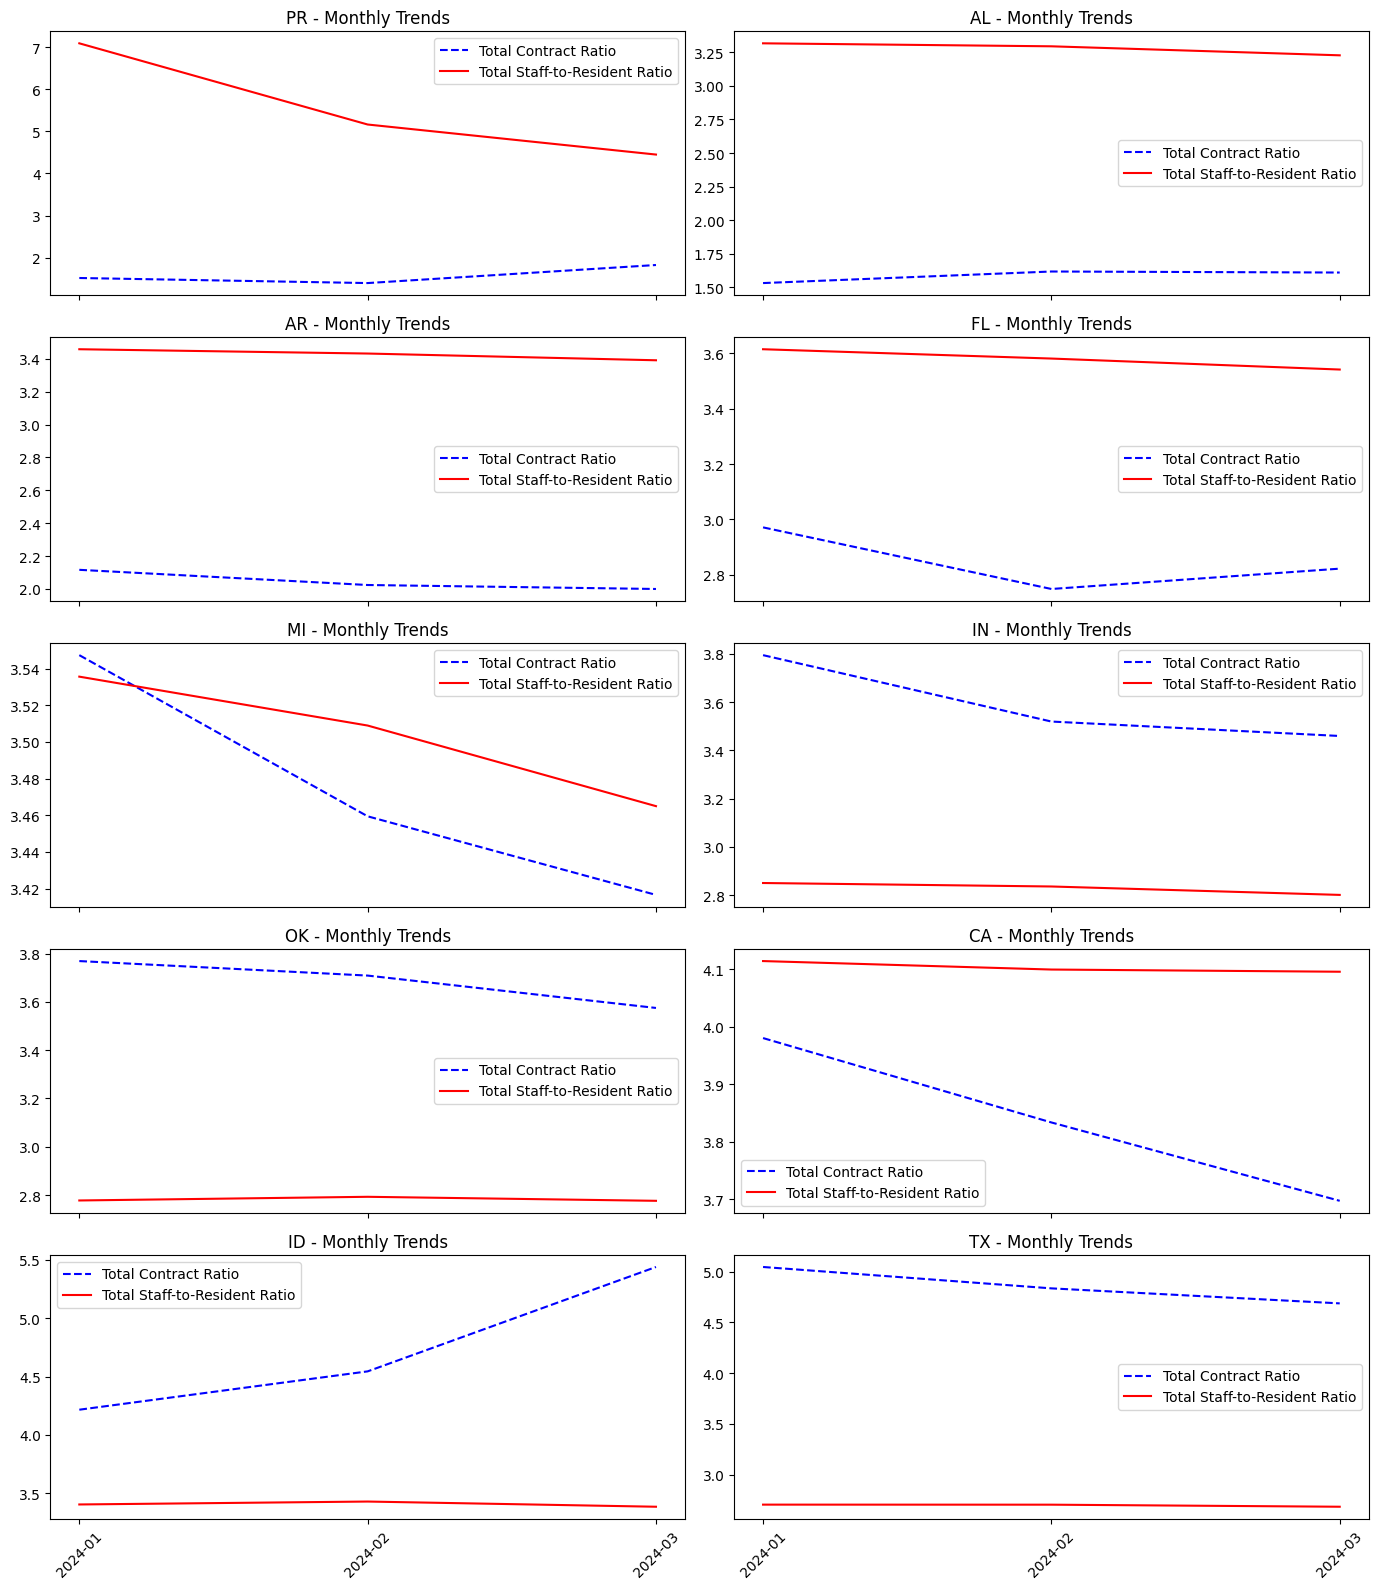

In [27]:
# trend analysis of least 10
def plot_least_10_subplots(states):
    fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 16), sharex=True)
    axes = axes.flatten()
    
    for i, state in enumerate(states):
        state_trend = monthly_trend_data[monthly_trend_data['STATE'] == state]
        
        # Plot Contract and Staff Ratio for each state
        axes[i].plot(state_trend['YearMonth'].astype(str), state_trend['total_contract_ratio'], label='Total Contract Ratio', color='b', linestyle='--')
        axes[i].plot(state_trend['YearMonth'].astype(str), state_trend['Total_staff_ratio'], label='Total Staff-to-Resident Ratio', color='r')
        axes[i].set_title(f'{state} - Monthly Trends')
        axes[i].legend()
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

plot_least_10_subplots(least_10_total)

### Just we did not have the complete data for the year Trend analysis might not be so successsfull

In [28]:
### CORRELATION

In [108]:
penalty_df = pd.read_csv("NH_Penalties_Sep2024.csv")
penalty_df

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Penalty Date,Penalty Type,Fine Amount,Payment Denial Start Date,Payment Denial Length in Days,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2023-03-02,Fine,23989.0,NaN,NaN,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",2024-09-01
1,015032,DIVERSICARE OF FOLEY,1701 NORTH ALSTON STREET,FOLEY,AL,36535,2023-06-19,Fine,10065.0,NaN,NaN,"1701 NORTH ALSTON STREET,FOLEY,AL,36535",2024-09-01
2,015040,DIVERSICARE OF MONTGOMERY,2020 NORTH COUNTRY CLUB DRIVE,MONTGOMERY,AL,36106,2021-09-06,Fine,650.0,NaN,NaN,"2020 NORTH COUNTRY CLUB DRIVE,MONTGOMERY,AL,36106",2024-09-01
3,015044,"CAREGIVERS OF PLEASANT GROVE, INC",700 FIRST AVENUE,PLEASANT GROVE,AL,35127,2021-09-17,Fine,20780.0,NaN,NaN,"700 FIRST AVENUE,PLEASANT GROVE,AL,35127",2024-09-01
4,015045,EAMC LANIER NURSING HOME,4800 48TH STREET,VALLEY,AL,36854,2021-11-15,Fine,650.0,NaN,NaN,"4800 48TH STREET,VALLEY,AL,36854",2024-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29619,745040,THE SARAH ROBERTS FRENCH HOME,1315 TEXAS AVE,SAN ANTONIO,TX,78201,2023-02-06,Fine,4580.0,NaN,NaN,"1315 TEXAS AVE,SAN ANTONIO,TX,78201",2024-09-01
29620,745040,THE SARAH ROBERTS FRENCH HOME,1315 TEXAS AVE,SAN ANTONIO,TX,78201,2022-12-19,Fine,4580.0,NaN,NaN,"1315 TEXAS AVE,SAN ANTONIO,TX,78201",2024-09-01
29621,745040,THE SARAH ROBERTS FRENCH HOME,1315 TEXAS AVE,SAN ANTONIO,TX,78201,2022-12-12,Fine,4580.0,NaN,NaN,"1315 TEXAS AVE,SAN ANTONIO,TX,78201",2024-09-01
29622,745040,THE SARAH ROBERTS FRENCH HOME,1315 TEXAS AVE,SAN ANTONIO,TX,78201,2022-12-05,Fine,4580.0,NaN,NaN,"1315 TEXAS AVE,SAN ANTONIO,TX,78201",2024-09-01


In [109]:
# merging data

In [116]:
df_trimmed = df[['PROVNUM', 'WorkDate', 'Total_staff_ratio', 'RN_contract_ratio', 
                 'LPN_contract_ratio', 'CNA_contract_ratio', 'Staffing_status']]

penalty_df['Penalty Date'] = pd.to_datetime(penalty_df['Penalty Date'], errors='coerce')
df_trimmed['WorkDate'] = pd.to_datetime(df_trimmed['WorkDate'], errors='coerce')

merged_df = pd.merge(df_trimmed, penalty_df, 
                     how='left', 
                     left_on=['PROVNUM', 'WorkDate'],  
                     right_on=['CMS Certification Number (CCN)', 'Penalty Date'])

/var/folders/wj/t_hntq2j583ghdyfg17304bm0000gn/T/ipykernel_29192/2503855836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trimmed['WorkDate'] = pd.to_datetime(df_trimmed['WorkDate'], errors='coerce')


In [118]:
num_rows = df.shape[0] 
print(f"Number of rows: {num_rows}")

Number of rows: 1330564


In [125]:
# Drop duplicates, keeping the first occurrence of each
merged_df = merged_df.drop_duplicates(subset=['PROVNUM', 'WorkDate'])

In [126]:
merged_df

,PROVNUM,WorkDate,Total_staff_ratio,RN_contract_ratio,LPN_contract_ratio,CNA_contract_ratio,Staffing_status,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Penalty Date,Penalty Type,Fine Amount,Payment Denial Start Date,Payment Denial Length in Days,Location,Processing Date
0,015009,2024-01-01,4.29,0.0,0.0,0.0,Adequately Staffed,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,015009,2024-01-02,4.72,0.0,0.0,0.0,Adequately Staffed,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,015009,2024-01-03,4.55,0.0,0.0,0.0,Adequately Staffed,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,015009,2024-01-04,4.24,0.0,0.0,0.0,Adequately Staffed,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,015009,2024-01-05,4.38,0.0,0.0,0.0,Adequately Staffed,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330788,745038,2024-03-27,3.13,0.0,0.0,0.0,Understaffed,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1330789,745038,2024-03-28,3.43,0.0,0.0,0.0,Understaffed,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1330790,745038,2024-03-29,2.76,0.0,0.0,0.0,Understaffed,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1330791,745038,2024-03-30,2.66,0.0,0.0,0.0,Understaffed,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


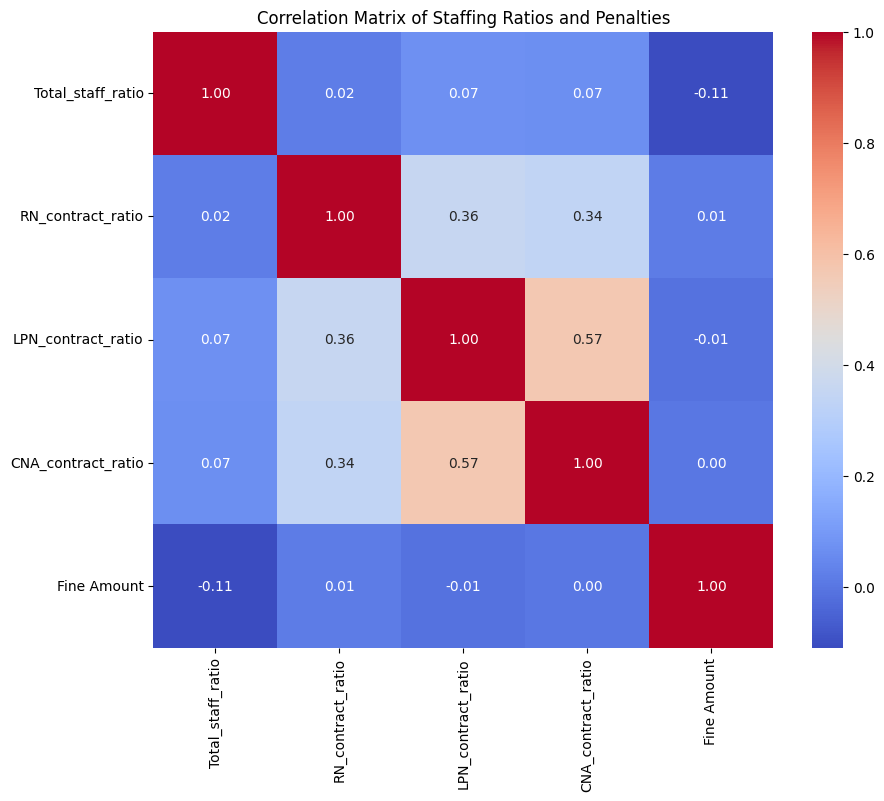

In [127]:
numeric_columns = ['Total_staff_ratio', 'RN_contract_ratio', 'LPN_contract_ratio', 
                   'CNA_contract_ratio', 'Fine Amount']

correlation_data = merged_df[numeric_columns].dropna()

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Staffing Ratios and Penalties')
plt.show()

### UNDERSTAFFING HAS NO RELATION WITH FINES FUNNY

In [132]:
contract_staff_analysis = df[[
    'PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'WorkDate', 'Total_staff_ratio', 'RN_contract_ratio', 
    'LPN_contract_ratio', 'CNA_contract_ratio', 'Staffing_status'
]]

In [133]:
high_contract_facilities = contract_staff_analysis[
    (contract_staff_analysis['RN_contract_ratio'] > 50) |
    (contract_staff_analysis['LPN_contract_ratio'] > 50) |
    (contract_staff_analysis['CNA_contract_ratio'] > 50)
]

In [141]:
# Now, let's further filter to find those that are Understaffed
high_contract_understaffed = high_contract_facilities[high_contract_facilities['Staffing_status'] == 'Understaffed']

# Rank the facilities by their Total Staff Ratio
high_contract_understaffed_ranked = high_contract_understaffed.sort_values(by='Total_staff_ratio', ascending=True)

high_contract_understaffed_ranked.head(40)

,PROVNUM,PROVNAME,CITY,STATE,WorkDate,Total_staff_ratio,RN_contract_ratio,LPN_contract_ratio,CNA_contract_ratio,Staffing_status
170533,105429,FIRST COAST HEALTH AND REHABILITATION CENTER,JACKSONVILLE,FL,2024-03-31,0.01,100.0,NaN,NaN,Understaffed
657955,265752,LAWRENCE COUNTY MANOR,MOUNT VERNON,MO,2024-01-26,0.03,NaN,NaN,100.0,Understaffed
786408,335753,BRONXCARE SPECIAL CARE CENTER,BRONX,NY,2024-03-18,0.03,NaN,NaN,100.0,Understaffed
702530,305094,MORRISON NURSING HOME,WHITEFIELD,NH,2024-01-11,0.04,NaN,100.0,NaN,Understaffed
677001,285085,NEWPORT HOUSE,OMAHA,NE,2024-02-22,0.04,NaN,NaN,100.0,Understaffed
583492,245276.0,MAPLEWOOD REHABILITATION CENTER,MAPLEWOOD,MN,2024-01-01,0.05,NaN,NaN,100.0,Understaffed
624213,25A233,"BAPTIST NURSING HOME-CALHOUN, INC",CALHOUN CITY,MS,2024-02-14,0.05,NaN,100.0,NaN,Understaffed
624208,25A233,"BAPTIST NURSING HOME-CALHOUN, INC",CALHOUN CITY,MS,2024-02-09,0.05,NaN,100.0,NaN,Understaffed
399269,165584,BETHANY HOME,DUBUQUE,IA,2024-02-22,0.06,NaN,NaN,100.0,Understaffed
131734,075034,CAROLTON CHRONIC & CONV HOSPITAL,FAIRFIELD,CT,2024-02-27,0.06,NaN,100.0,NaN,Understaffed


In [135]:
# Check for missing values in contract ratios
missing_ratios = high_contract_understaffed_ranked[['RN_contract_ratio', 'LPN_contract_ratio', 'CNA_contract_ratio']].isnull().sum()
print(missing_ratios)

RN_contract_ratio     6077
LPN_contract_ratio    1922
CNA_contract_ratio     298
dtype: int64


In [149]:
# Fill NaN values with 0 for contract ratios
high_contract_understaffed_ranked_filled = high_contract_understaffed_ranked.fillna(0)

high_contract_understaffed_ranked_filled.head(10)

,PROVNUM,PROVNAME,CITY,STATE,WorkDate,Total_staff_ratio,RN_contract_ratio,LPN_contract_ratio,CNA_contract_ratio,Staffing_status
170533,105429,FIRST COAST HEALTH AND REHABILITATION CENTER,JACKSONVILLE,FL,2024-03-31,0.01,100.0,0.0,0.0,Understaffed
657955,265752,LAWRENCE COUNTY MANOR,MOUNT VERNON,MO,2024-01-26,0.03,0.0,0.0,100.0,Understaffed
786408,335753,BRONXCARE SPECIAL CARE CENTER,BRONX,NY,2024-03-18,0.03,0.0,0.0,100.0,Understaffed
702530,305094,MORRISON NURSING HOME,WHITEFIELD,NH,2024-01-11,0.04,0.0,100.0,0.0,Understaffed
677001,285085,NEWPORT HOUSE,OMAHA,NE,2024-02-22,0.04,0.0,0.0,100.0,Understaffed
583492,245276.0,MAPLEWOOD REHABILITATION CENTER,MAPLEWOOD,MN,2024-01-01,0.05,0.0,0.0,100.0,Understaffed
624213,25A233,"BAPTIST NURSING HOME-CALHOUN, INC",CALHOUN CITY,MS,2024-02-14,0.05,0.0,100.0,0.0,Understaffed
624208,25A233,"BAPTIST NURSING HOME-CALHOUN, INC",CALHOUN CITY,MS,2024-02-09,0.05,0.0,100.0,0.0,Understaffed
399269,165584,BETHANY HOME,DUBUQUE,IA,2024-02-22,0.06,0.0,0.0,100.0,Understaffed
131734,075034,CAROLTON CHRONIC & CONV HOSPITAL,FAIRFIELD,CT,2024-02-27,0.06,0.0,100.0,0.0,Understaffed


In [142]:
# Create a priority ranking based on Total_staff_ratio and contract ratios
high_contract_understaffed_ranked_filled['priority_score'] = (
    high_contract_understaffed_ranked_filled['Total_staff_ratio'] +
    high_contract_understaffed_ranked_filled['RN_contract_ratio'] +
    high_contract_understaffed_ranked_filled['LPN_contract_ratio'] +
    high_contract_understaffed_ranked_filled['CNA_contract_ratio']
)

high_priority_facilities = high_contract_understaffed_ranked_filled.sort_values(by='priority_score', ascending=True)

high_priority_facilities.head(10)

,PROVNUM,PROVNAME,CITY,STATE,WorkDate,Total_staff_ratio,RN_contract_ratio,LPN_contract_ratio,CNA_contract_ratio,Staffing_status,priority_score
394180,165503,GOOD NEIGHBOR HOME,MANCHESTER,IA,2024-02-29,0.52,0.00,0.00,50.38,Understaffed,50.90
659831,265772,STONEBRIDGE DESOTO,DE SOTO,MO,2024-03-22,1.14,0.00,50.04,0.00,Understaffed,51.18
654259,265698,"NICK'S HEALTH CARE CENTER, LLC",PLATTSBURG,MO,2024-03-01,0.65,0.00,0.00,50.53,Understaffed,51.18
1260575,675371,RIVERVIEW NURSING & REHABILITATION,BOERNE,TX,2024-02-13,1.17,0.00,50.26,0.00,Understaffed,51.43
1282744,675881,TRANS-PECOS NURSING & REHABILITATION,PECOS,TX,2024-01-09,0.93,0.00,50.52,0.00,Understaffed,51.45
256420,135084,OAK CREEK REHABILITATION CENTER OF KIMBERLY,KIMBERLY,ID,2024-03-14,1.04,50.42,0.00,0.00,Understaffed,51.46
1246753,675018,RIVER OAKS HEALTH AND REHABILITATION CENTER,FORT WORTH,TX,2024-02-23,1.11,0.00,0.00,50.40,Understaffed,51.51
641118,265469,LEVERING REGIONAL HEALTH CARE CENTER,HANNIBAL,MO,2024-01-24,1.03,0.00,50.49,0.00,Understaffed,51.52
627232,265160,LEWIS & CLARK GARDENS,SAINT CHARLES,MO,2024-03-01,1.48,0.00,50.06,0.00,Understaffed,51.54
1038498,425310,BLUE RIDGE OF SUMTER,SUMTER,SC,2024-01-07,1.23,0.00,0.00,50.34,Understaffed,51.57


In [160]:
# Group by state characteristics
state_avg_contract_ratio = high_contract_understaffed_ranked_filled.groupby('STATE')[['RN_contract_ratio', 'LPN_contract_ratio', 'CNA_contract_ratio']].mean()

state_avg_contract_ratio_sorted = state_avg_contract_ratio.sort_values(by='RN_contract_ratio', ascending=False)

state_avg_contract_ratio_sorted.head(5)

,RN_contract_ratio,LPN_contract_ratio,CNA_contract_ratio
STATE,,,
MA,57.400609,40.361806,20.265034
DE,57.000140,50.365978,34.418101
VA,53.954088,37.283401,21.090442
IL,52.993818,39.694610,18.100170
OR,52.957866,44.302439,32.320537


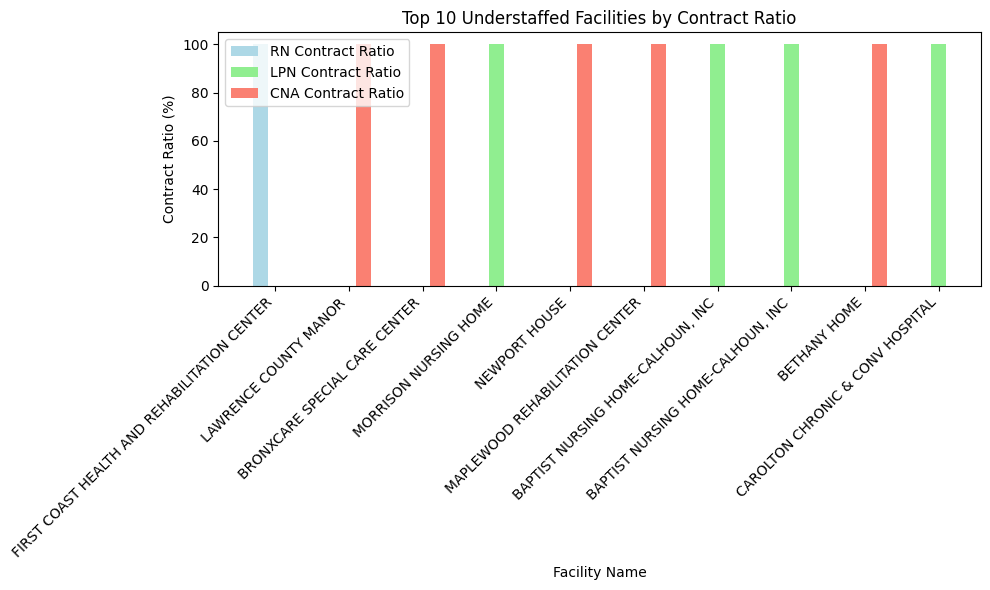

In [161]:
top_10_understaffed = high_contract_understaffed_ranked.head(10)

x = np.arange(len(top_10_understaffed['PROVNAME']))

bar_width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each contract ratio as individual bars
ax.bar(x - bar_width, top_10_understaffed['RN_contract_ratio'], width=bar_width, label='RN Contract Ratio', color='lightblue')
ax.bar(x, top_10_understaffed['LPN_contract_ratio'], width=bar_width, label='LPN Contract Ratio', color='lightgreen')
ax.bar(x + bar_width, top_10_understaffed['CNA_contract_ratio'], width=bar_width, label='CNA Contract Ratio', color='salmon')

ax.set_xticks(x)
ax.set_xticklabels(top_10_understaffed['PROVNAME'], rotation=45, ha='right')
ax.set_xlabel('Facility Name')
ax.set_ylabel('Contract Ratio (%)')
ax.set_title('Top 10 Understaffed Facilities by Contract Ratio')

ax.legend()

plt.tight_layout()
plt.show()

/var/folders/wj/t_hntq2j583ghdyfg17304bm0000gn/T/ipykernel_29192/352152599.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='STATE', y='Understaffed_Facilities', data=statewise_understaffed, palette='Blues_d')


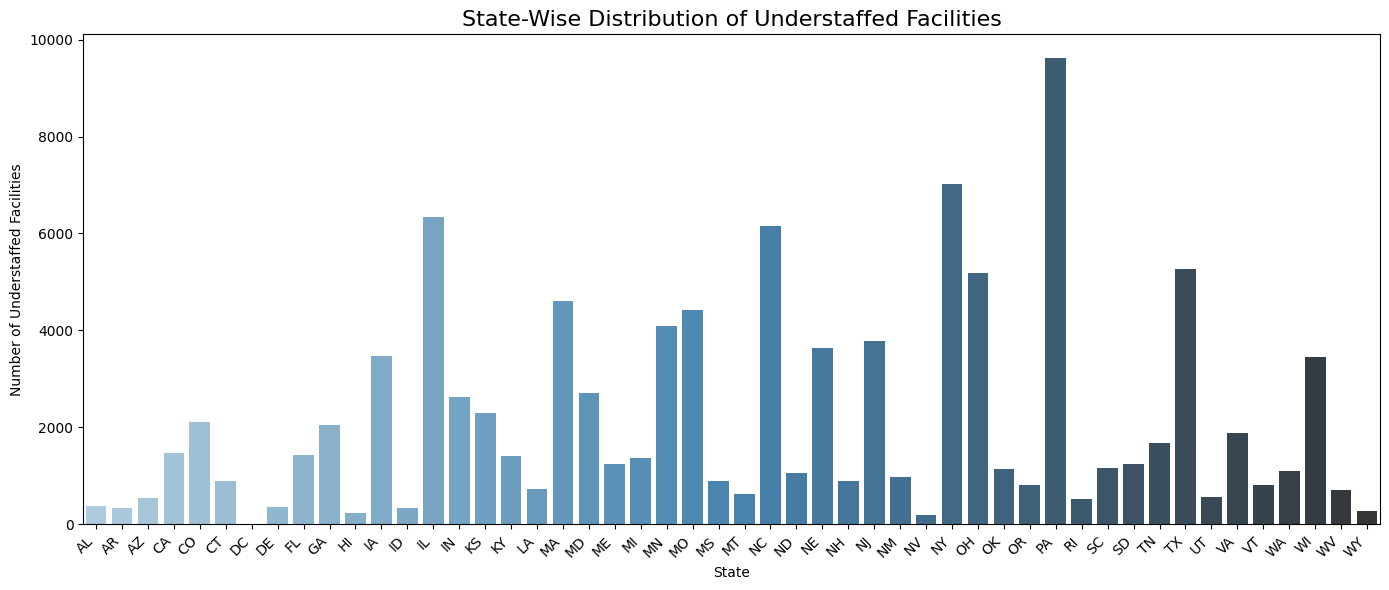

In [152]:
# Aggregate the count of understaffed facilities per state
statewise_understaffed = high_contract_understaffed_ranked.groupby('STATE').size().reset_index(name='Understaffed_Facilities')

 
plt.figure(figsize=(14, 6))
sns.barplot(x='STATE', y='Understaffed_Facilities', data=statewise_understaffed, palette='Blues_d')

plt.title('State-Wise Distribution of Understaffed Facilities', fontsize=16)
plt.ylabel('Number of Understaffed Facilities')
plt.xlabel('State')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()